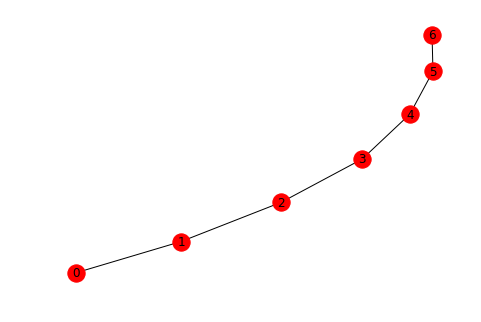

[(0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 1)]
{0: 0.08333333333333333, 1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.08333333333333333}
[3]
0.16666666666666666


In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

#Create a graph 

#Graph connected with initial nodes
m0=7

#Total Nodes
N=1200

grph=nx.path_graph(m0)
plt.figure()
nx.draw(grph,with_labels=True)
plt.show()

d=nx.degree(grph)
print(d)

prob_dict={}
probs=[]
for nodes in grph.nodes():
        prob=(float)(grph.degree(nodes))/sum([x[1] for x in d])
        prob_dict[nodes]=prob
        probs.append(prob)
print(prob_dict)
n=np.random.choice(grph.nodes(),1,replace=False,p=probs)
j=prob_dict[n.item(0)]
print(n)
print(j)

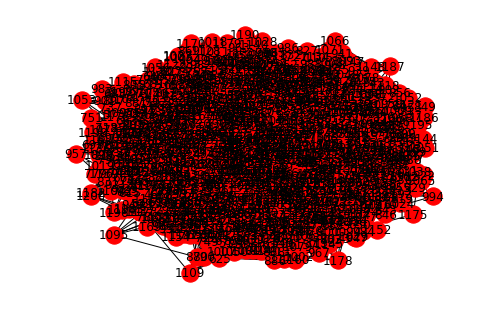

In [14]:
def barabasi_albert_graph(grph,N,m0):
    n_e=m0-1
    for i in range(m0+1,N+1):
        grph.add_node(i)
        prob_dict={}
        probs=[]
        for nodes in grph.nodes():
            prob=grph.degree(nodes)/sum([x[1] for x in d])
            prob_dict[nodes]=prob
            probs.append(prob)
        selected_random_node=np.random.choice(grph.nodes(),m0,replace=False,p=probs)
        for j in range(0,len(selected_random_node)):
            grph.add_edge(i,selected_random_node.item(j))
    return grph

grph=barabasi_albert_graph(grph,N,m0)
plt.figure()
nx.draw(grph,with_labels=True)
plt.show()

            

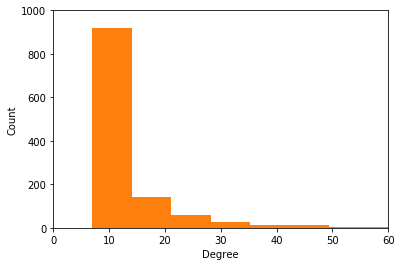

In [22]:
deg=nx.degree(grph)
deg1=[]
for x in deg:
    deg1.append(x[1])
#print(deg1)
deg2=sorted(deg1,reverse=True)
plt.axis([0, 60, 0, 1000])
plt.hist(deg2,bins=25)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()
#print(nx.info(grph))
            

In [16]:
#Number of edges, average shortest path length and average clustering coefficient
num_edges=grph.number_of_edges()
print("The Number of edges",num_edges)
avg_shortest_path=nx.average_shortest_path_length(grph)
print("The average shortest path",avg_shortest_path)
avg_clust_coeff=nx.average_clustering(grph)
print("The average clustering coefficient",avg_clust_coeff)

The Number of edges 8357
The average shortest path 2.7818835140394773
The average clustering coefficient 0.04607492231390966


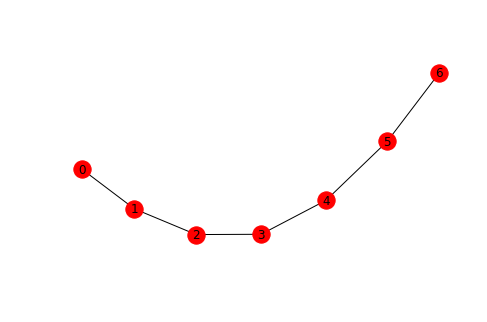

In [23]:
#Alternative Approach for Preferential attachment using degree
N1=1200
m=7

grph1=nx.path_graph(m)
plt.figure()
nx.draw(grph1,with_labels=True)
plt.show()
d1=nx.degree(grph1)

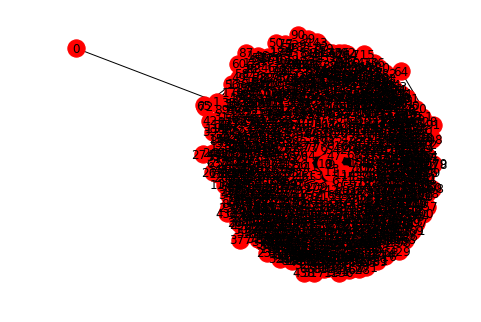

In [24]:
#Alternative Approach for Preferential attachment using degree

#Adding node to the graph
def barabasi_albert_graph1(grph1,N1,m):
    n_e=m-1
    for i in range(m+1,N1+1):
        grph1.add_node(i)
    
    #Add edges to the nodes with preferential attachment
    #Calculate probability
        prob_dict={}
        probs=[]
        for nodes in grph1.nodes():
            prob=grph1.degree(nodes)/sum([x[1] for x in d1])
            prob_dict[nodes]=prob
            probs.append(prob)
            
    
    #Select a random number between 0 and 1 and if it is less than the prob of node connect to it
    #Maintain the list of edges of new_node which already connect to the nodes
        edges_added=0
        nodes_added=[]
        while edges_added<n_e:
            selected_random_node=np.random.choice(grph1.nodes(),1,replace=False,p=probs)
            prob_node=prob_dict[selected_random_node.item(0)]
            r=random.random()
            if(r<prob_node):
                if(selected_random_node.item(0) in nodes_added):
                    continue
                else:
                    grph1.add_edge(i,selected_random_node.item(0))
                    nodes_added.append(selected_random_node.item(0))
                    edges_added+=1
    return grph1
                    
grph1=barabasi_albert_graph1(grph1,N1,m)
plt.figure()
nx.draw(grph1,with_labels=True)
plt.show()
 
    

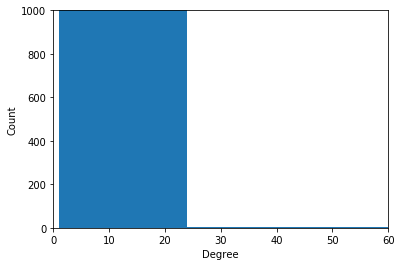

Name: 
Type: Graph
Number of nodes: 1200
Number of edges: 7164
Average degree:  11.9400


In [25]:
#Histogram for the alternative approach 
#print(nx.degree(grph))
degree=nx.degree(grph1)
degree1=[]
for x in degree:
    degree1.append(x[1])
#print(deg1)
degree1=sorted(degree1,reverse=True)
plt.axis([0, 60, 0, 1000])
plt.hist(degree1,bins=50)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()
print(nx.info(grph1))

In [26]:
#Number of edges, average shortest path length and average clustering coefficient
num_edges1=grph1.number_of_edges()
print("The Number of edges",num_edges1)
avg_shortest_path1=nx.average_shortest_path_length(grph1)
print("The average shortest path",avg_shortest_path1)
avg_clust_coeff1=nx.average_clustering(grph1)
print("The average clustering coefficient",avg_clust_coeff1)

The Number of edges 7164
The average shortest path 1.9917556296914094
The average clustering coefficient 0.892270750121448


In [27]:
#Random Graph 
random_gr=nx.erdos_renyi_graph(n=1200, p=0.009912)
print(nx.info(random_gr))

Name: 
Type: Graph
Number of nodes: 1200
Number of edges: 7183
Average degree:  11.9717


In [28]:
#shortest path length and avg clustering coefficient
random_avg_path=nx.average_shortest_path_length(random_gr)
print("The random graph average path length",random_avg_path)
random_avg_clust_coeff=nx.average_clustering(random_gr)
print("The random graph average clustering coefficient",random_avg_clust_coeff)

The random graph average path length 3.115888240200167
The random graph average clustering coefficient 0.009779145587565308


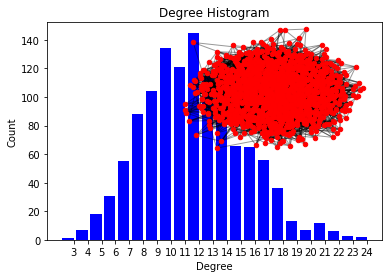

In [30]:
#Histogram for random graph
import collections
degree_sequence = sorted([d for n, d in random_gr.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(random_gr), key=len, reverse=True)[0]
pos = nx.spring_layout(random_gr)
plt.axis('off')
nx.draw_networkx_nodes(random_gr, pos, node_size=20)
nx.draw_networkx_edges(random_gr, pos, alpha=0.4)

plt.show()

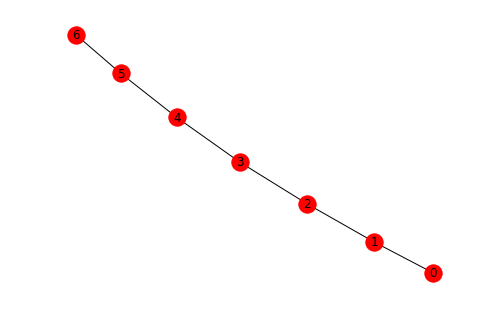

In [35]:
#Preferential attachment without using degree

m_new=7

#Total Nodes
N1=1200

new_grph=nx.path_graph(m_new)
plt.figure()
nx.draw(new_grph,with_labels=True)
plt.show()



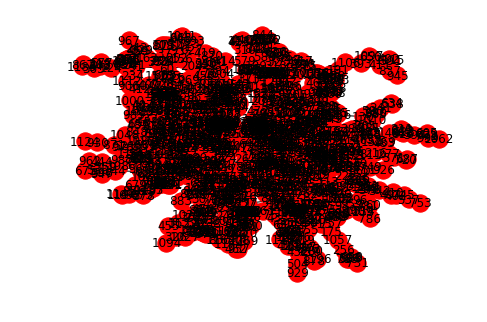

In [36]:
#preferential attachment using edges 
def barabasi_albert_graph_wo_degree(new_grph,N1,m_new):
    n_e1=m_new-1
    for i in range(m_new+1,N1+1):
        new_grph.add_node(i)
        edge_view=new_grph.edges()
        edge_view=np.array(edge_view)
        index=np.random.choice(len(edge_view),1,replace=False)
        tup=edge_view[index]
        tup_lst=tup[0]
        selected_random_node=np.random.choice(tup_lst,1,replace=False)
        new_grph.add_edge(i,selected_random_node.item(0))
    return new_grph
        
new_grph=barabasi_albert_graph_wo_degree(new_grph,N1,m_new)
plt.figure()
nx.draw(new_grph,with_labels=True)
plt.show()

    

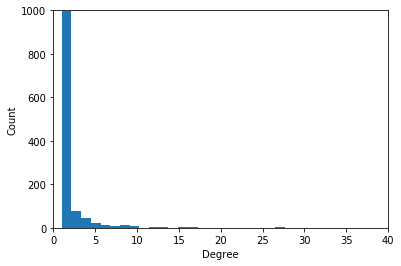

Name: 
Type: Graph
Number of nodes: 1200
Number of edges: 1199
Average degree:   1.9983


In [37]:
#Histogram of the distribution
new_degree=nx.degree(new_grph)
degree2=[]
for x in new_degree:
    degree2.append(x[1])
#print(deg1)
degree2=sorted(degree2,reverse=True)
plt.axis([0, 40, 0, 1000])
plt.hist(degree2,bins=50)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()
print(nx.info(new_grph))

Response:
1.The graph created using BA algorithm we can see that the histogram showcases power law distribution.
2.And for the random graph created its histogram showcases poisson distribution.
3.The graph created with BA algorithm without using degree we can see that the histogram of it also showcases power law distribution.